<a href="https://colab.research.google.com/github/ukeerthi/Kaggle-Practice/blob/master/Kaggle_Practice1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaggle: Natural Images**<br/>
A compiled dataset of 6899 images from 8 distinct classes. <br/>
Please click the following link to the dataset: https://www.kaggle.com/prasunroy/natural-images<br/><br/>
The model utilizes the pretrained Inception model to classify the images more acurately.


In [0]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
from google.colab import files

# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras.applications.inception_v3 import InceptionV3

--2019-10-30 02:55:10--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 2607:f8b0:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   211MB/s    in 0.4s    

2019-10-30 02:55:10 (211 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pretrained_model = InceptionV3(input_shape = (150, 150, 3),
                               include_top = False,
                               weights = None)

pretrained_model.load_weights(local_weights_file)

for layer in pretrained_model.layers:
  layer.trainable = False

pretrained_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______

In [0]:
last_layer = pretrained_model.get_layer('mixed7')
last_output = last_layer.output
print(last_layer.output_shape)

(None, 7, 7, 768)


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('acc') > 0.999:
      print('\nReached 99.9% accuracy so cancelling training!')
      self.model.stop_training = True

In [0]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(8, activation = 'softmax')(x)

In [0]:
model = tf.keras.Model(pretrained_model.input, x)
model.compile(optimizer = RMSprop(lr = 1e-4),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [0]:
from google.colab import files
upload_file = files.upload()

Saving natural-images.zip to natural-images.zip


In [0]:
zip_ref = zipfile.ZipFile('natural-images.zip', 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [0]:
len(os.listdir('/tmp/data/natural_images/airplane'))

727

In [0]:
len(os.listdir('/tmp/natural_images/airplane'))

727

In [0]:
os.mkdir('/tmp/training/')
os.mkdir('/tmp/training/airplane/')
os.mkdir('/tmp/training/car/')
os.mkdir('/tmp/training/cat/')
os.mkdir('/tmp/training/dog/')
os.mkdir('/tmp/training/flower/')
os.mkdir('/tmp/training/fruit/')
os.mkdir('/tmp/training/motorbike/')
os.mkdir('/tmp/training/person/')

os.mkdir('/tmp/testing/')
os.mkdir('/tmp/testing/airplane/')
os.mkdir('/tmp/testing/car/')
os.mkdir('/tmp/testing/cat/')
os.mkdir('/tmp/testing/dog/')
os.mkdir('/tmp/testing/flower/')
os.mkdir('/tmp/testing/fruit/')
os.mkdir('/tmp/testing/motorbike/')
os.mkdir('/tmp/testing/person/')

In [0]:
import random
from shutil import copyfile
def split_data(source_dir, train_dir, test_dir, spilt_size=0.9):
  files = []
  for fname in os.listdir(source_dir):
    if os.path.getsize(source_dir + fname) == 0:
      print("Ignoring", fname)
    else:
      files.append(fname)

  shuffled_files = random.sample(files, len(files))
  split_idx = int(len(files) * spilt_size)
  train_list = shuffled_files[:split_idx]
  test_list = shuffled_files[split_idx:]

  for fname in train_list:
    copyfile(source_dir + fname, train_dir + fname)

  for fname in test_list:
    copyfile(source_dir + fname, test_dir + fname)

In [0]:
spilt_size = 0.9

source_dir = '/tmp/natural_images/airplane/'
train_dir = '/tmp/training/airplane/'
test_dir = '/tmp/testing/airplane/'
split_data(source_dir, train_dir, test_dir, spilt_size)

source_dir = '/tmp/natural_images/car/'
train_dir = '/tmp/training/car/'
test_dir = '/tmp/testing/car/'
split_data(source_dir, train_dir, test_dir, spilt_size)

source_dir = '/tmp/natural_images/cat/'
train_dir = '/tmp/training/cat/'
test_dir = '/tmp/testing/cat/'
split_data(source_dir, train_dir, test_dir, spilt_size)

source_dir = '/tmp/natural_images/dog/'
train_dir = '/tmp/training/dog/'
test_dir = '/tmp/testing/dog/'
split_data(source_dir, train_dir, test_dir, spilt_size)

source_dir = '/tmp/natural_images/flower/'
train_dir = '/tmp/training/flower/'
test_dir = '/tmp/testing/flower/'
split_data(source_dir, train_dir, test_dir, spilt_size)

source_dir = '/tmp/natural_images/fruit/'
train_dir = '/tmp/training/fruit/'
test_dir = '/tmp/testing/fruit/'
split_data(source_dir, train_dir, test_dir, spilt_size)

source_dir = '/tmp/natural_images/motorbike/'
train_dir = '/tmp/training/motorbike/'
test_dir = '/tmp/testing/motorbike/'
split_data(source_dir, train_dir, test_dir, spilt_size)

source_dir = '/tmp/natural_images/person/'
train_dir = '/tmp/training/person/'
test_dir = '/tmp/testing/person/'
split_data(source_dir, train_dir, test_dir, spilt_size)



In [0]:
len(os.listdir(test_dir))

99

In [0]:
train_dir = '/tmp/training/'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    target_size=(150, 150))

validation_dir = '/tmp/testing/'
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              class_mode='categorical',
                                                              batch_size=32,
                                                              target_size=(150, 150))

Found 6206 images belonging to 8 classes.
Found 693 images belonging to 8 classes.


In [0]:
history = model.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
194/194 [==============================] - 58s 300ms/step - loss: 0.2487 - acc: 0.9175 - val_loss: 0.0308 - val_acc: 0.9885
Epoch 2/15
194/194 [==============================] - 50s 259ms/step - loss: 0.1099 - acc: 0.9626 - val_loss: 0.0197 - val_acc: 0.9928
Epoch 3/15
194/194 [==============================] - 51s 261ms/step - loss: 0.1093 - acc: 0.9654 - val_loss: 0.0294 - val_acc: 0.9899
Epoch 4/15
194/194 [==============================] - 51s 264ms/step - loss: 0.1009 - acc: 0.9686 - val_loss: 0.0556 - val_acc: 0.9885
Epoch 5/15
194/194 [==============================] - 51s 261ms/step - loss: 0.0962 - acc: 0.9733 - val_loss: 0.0109 - val_acc: 0.9942
Epoch 6/15
194/194 [==============================] - 51s 263ms/step - loss: 0.0812 - acc: 0.9766 - val_loss: 0.0028 - val_acc: 0.9986
Epoch 7/15
194/194 [==============================] - 51s 261ms/step - loss: 0.0840 - acc: 0.9781 - val_loss: 0.0254 - val_acc: 0.9928
Epoch 8/15
194/194 [==============================] - 5

<Figure size 432x288 with 0 Axes>

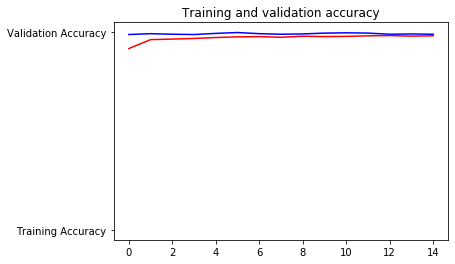

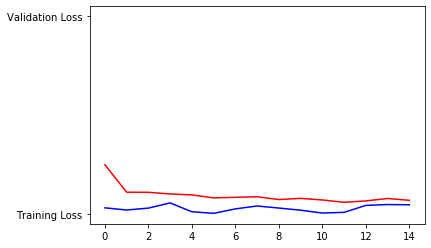

<Figure size 432x288 with 0 Axes>

In [0]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)